In [1]:
# mean width of channel, mask

In [20]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from corrLib import divide_windows
from pivLib import read_piv

In [2]:
mask = io.imread(r"test_files/mask.tif")

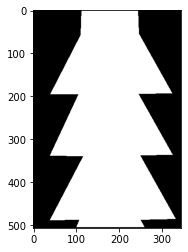

In [3]:
plt.imshow(mask, cmap="gray")

In [4]:
help(divide_windows)

Help on function divide_windows in module corrLib:

divide_windows(img, windowsize=[20, 20], step=10)



In [6]:
X, Y, I = divide_windows(mask, windowsize=[32, 32], step=16)

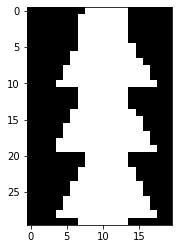

In [12]:
plt.imshow(I>=I.max(), cmap="gray") # the correct boundary criterion

In [13]:
# get W(y), the width for each y
bool_mask = I>=I.max()

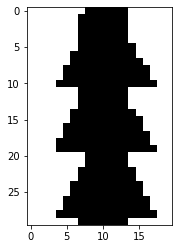

In [15]:
plt.imshow(~bool_mask, cmap="gray")

In [17]:
W = np.count_nonzero(bool_mask, axis=1)

Text(0, 0.5, 'nonzero element number')

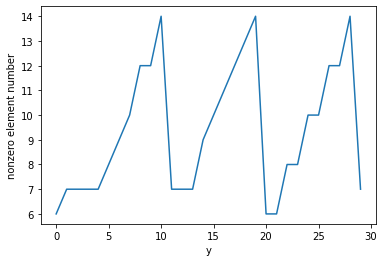

In [19]:
plt.plot(W)
plt.xlabel("y")
plt.ylabel("nonzero element number")

In [21]:
x, y, u, v = read_piv(r"test_files/piv-test.csv")

In [30]:
u[~bool_mask] = np.nan
v[~bool_mask] = np.nan

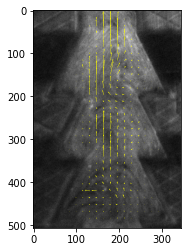

In [32]:
img = io.imread(r"test_files/cropped_images/crop-0/crop-test.tif")
plt.imshow(img, cmap="gray")
plt.quiver(x, y, u, v, color="yellow")

In [35]:
np.nanmean(v)

0.8212671441214119

In [44]:
def compute_flowrate(v, winsize):
    """Compute flow rate in channels based on masked PIV data.
    Args:
    v -- masked PIV velocity in channel direction. (px/s)
    winsize -- PIV window size in pixel. (px)
    Returns:
    Q -- flow rate (px^2/s)"""
    mask = ~np.isnan(v)
    W = np.count_nonzero(mask, axis=1) # channel width (number of windows)
    w = (W + 0.5) * winsize # channel width (px)
    v_meanx = np.nanmean(v, axis=1)
    print(v_meanx)
    Q = (w * v_meanx).mean(axis=0)
    return Q

In [38]:
Q = compute_flowrate(v, 32)
Q

261.2072961271773

What if v is a (x, y, t) array?

In [45]:
v3 = np.stack([v, v, v], axis=2)
compute_flowrate(v3, 32)

[[1.25923184 1.25923184 1.25923184]
 [2.13142041 2.13142041 2.13142041]
 [2.12403384 2.12403384 2.12403384]
 [2.05985622 2.05985622 2.05985622]
 [1.88449596 1.88449596 1.88449596]
 [1.13508744 1.13508744 1.13508744]
 [1.13722721 1.13722721 1.13722721]
 [1.05048804 1.05048804 1.05048804]
 [1.26967333 1.26967333 1.26967333]
 [1.01622559 1.01622559 1.01622559]
 [0.59055795 0.59055795 0.59055795]
 [0.99740805 0.99740805 0.99740805]
 [0.47055787 0.47055787 0.47055787]
 [0.36355593 0.36355593 0.36355593]
 [0.55899506 0.55899506 0.55899506]
 [0.94685054 0.94685054 0.94685054]
 [1.22477535 1.22477535 1.22477535]
 [0.71366697 0.71366697 0.71366697]
 [0.74324002 0.74324002 0.74324002]
 [0.54159366 0.54159366 0.54159366]
 [1.40927116 1.40927116 1.40927116]
 [0.63100538 0.63100538 0.63100538]
 [0.39671954 0.39671954 0.39671954]
 [0.38855642 0.38855642 0.38855642]
 [0.35996276 0.35996276 0.35996276]
 [0.41300856 0.41300856 0.41300856]
 [0.27712944 0.27712944 0.27712944]
 [0.14141608 0.14141608 0.14

array([261.20729613, 261.20729613, 261.20729613])